## Project Overview
Air traffic refers to the movement of passengers by airlines, which can be influenced by various factors such as seasonality, economic conditions, and global events. Understanding passenger trends is crucial for airlines and airports to optimise capacity, manage resources, and enhance customer satisfaction. This project aims to build a predictive model for airline passenger numbers using historical data from the airPassengers dataset. By forecasting future passenger volumes, the airline industry can better plan operations, adjust staffing, and implement targeted emarketing strategies to improve service and efficiency.

## Objective
The primary goal is to forecast the number of airline passengers for upcoming months based on historical passenger data.
This will be achieved by analysing trends, seasonality, and potential influencing factors such as holidays or economi 
indicators. Accurate predictions will enable airlines to optimise flight schedules, manage staffing levels, and enha ce
operational efficiency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
from   pylab import rcParams
from   datetime import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
passenger_data = pd.read_csv("../b. Datasets/AirPassenger/AirPassenger.csv")

In [3]:
passenger_data.head(2)

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118


In [4]:
passenger_data.tail(2)

,Year-Month,Pax
142,1960-Nov,390
143,1960-Dec,432


In [5]:
start_date = '1949'
end_date = '1961'

# Generate a monthly time range to ensure there are no issues with values.
passenger_data['Year-Month'] = pd.date_range(start=start_date, end=end_date, freq='M')
passenger_data.set_index('Year-Month', inplace=True)

In [6]:
passenger_data.head(2)

,Pax
Year-Month,
1949-01-31,112
1949-02-28,118


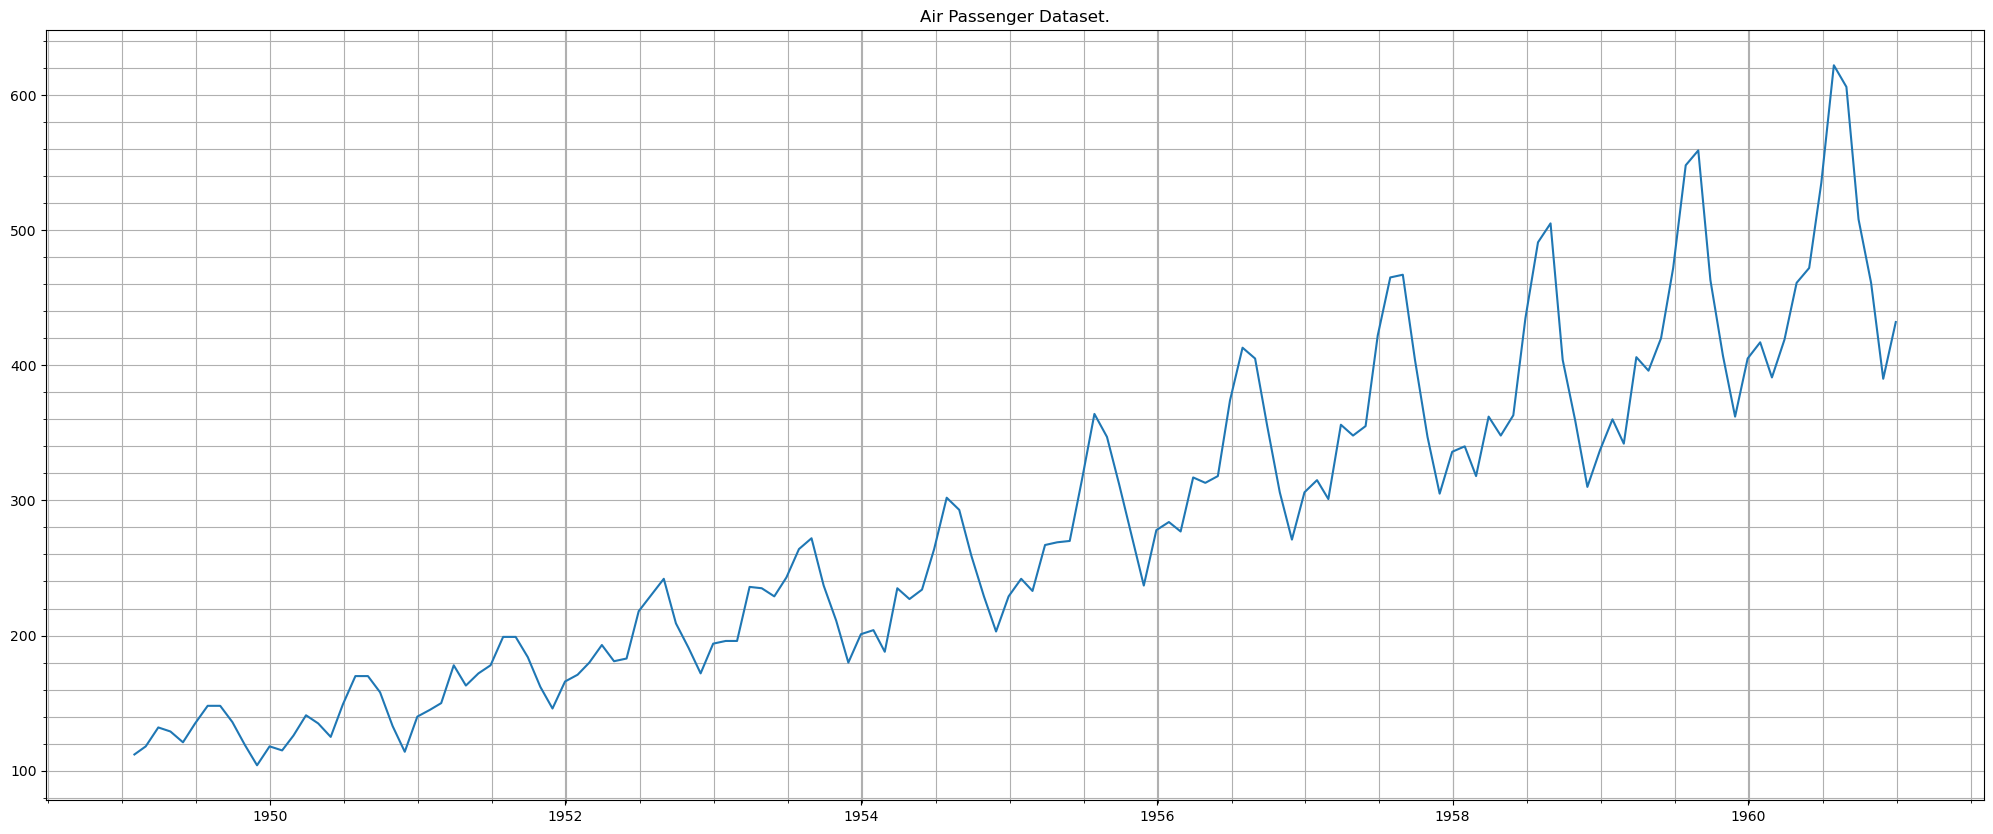

In [7]:
plt.figure(figsize=(25, 10))
plt.plot(passenger_data)
plt.title("Air Passenger Dataset.")
plt.minorticks_on()
plt.grid(which='both')
plt.show()

In [8]:
train_end = datetime(1958,12,31)
validation_end = datetime(1960,12,31)

train_data = passenger_data[:train_end] 
validation_data = passenger_data[train_end + timedelta(days=1):validation_end]

In [9]:
print('Train Data')
display(train_data.head(2), train_data.tail(2))
print('\n\nValidation Data')
display(validation_data.head(2), validation_data.tail(2))

Train Data


,Pax
Year-Month,
1949-01-31,112
1949-02-28,118


,Pax
Year-Month,
1958-11-30,310
1958-12-31,337




Validation Data


,Pax
Year-Month,
1959-01-31,360
1959-02-28,342


,Pax
Year-Month,
1960-11-30,390
1960-12-31,432


## Since this dataset is showing a good amount of trend and seasonality, we can try out the Holt-Winters Model.

In [10]:
holt_winters_model_add_add = ExponentialSmoothing(train_data, trend='additive', seasonal='additive', 
                                                  initialization_method='estimated')

In [11]:
holt_winters_model_add_add = holt_winters_model_add_add.fit(optimized=True)

In [12]:
holt_winters_model_add_add.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,ExponentialSmoothing,SSE,16033.675
Optimized:,True,AIC,619.395
Trend:,Additive,BIC,663.994
Seasonal:,Additive,AICC,626.167
Seasonal Periods:,12,Date:,"Sat, 26 Oct 2024"
Box-Cox:,False,Time:,16:50:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2367762,alpha,True
smoothing_trend,1.182e-06,beta,True


In [13]:
validation_forecast_add_add =  holt_winters_model_add_add.forecast(len(validation_data))

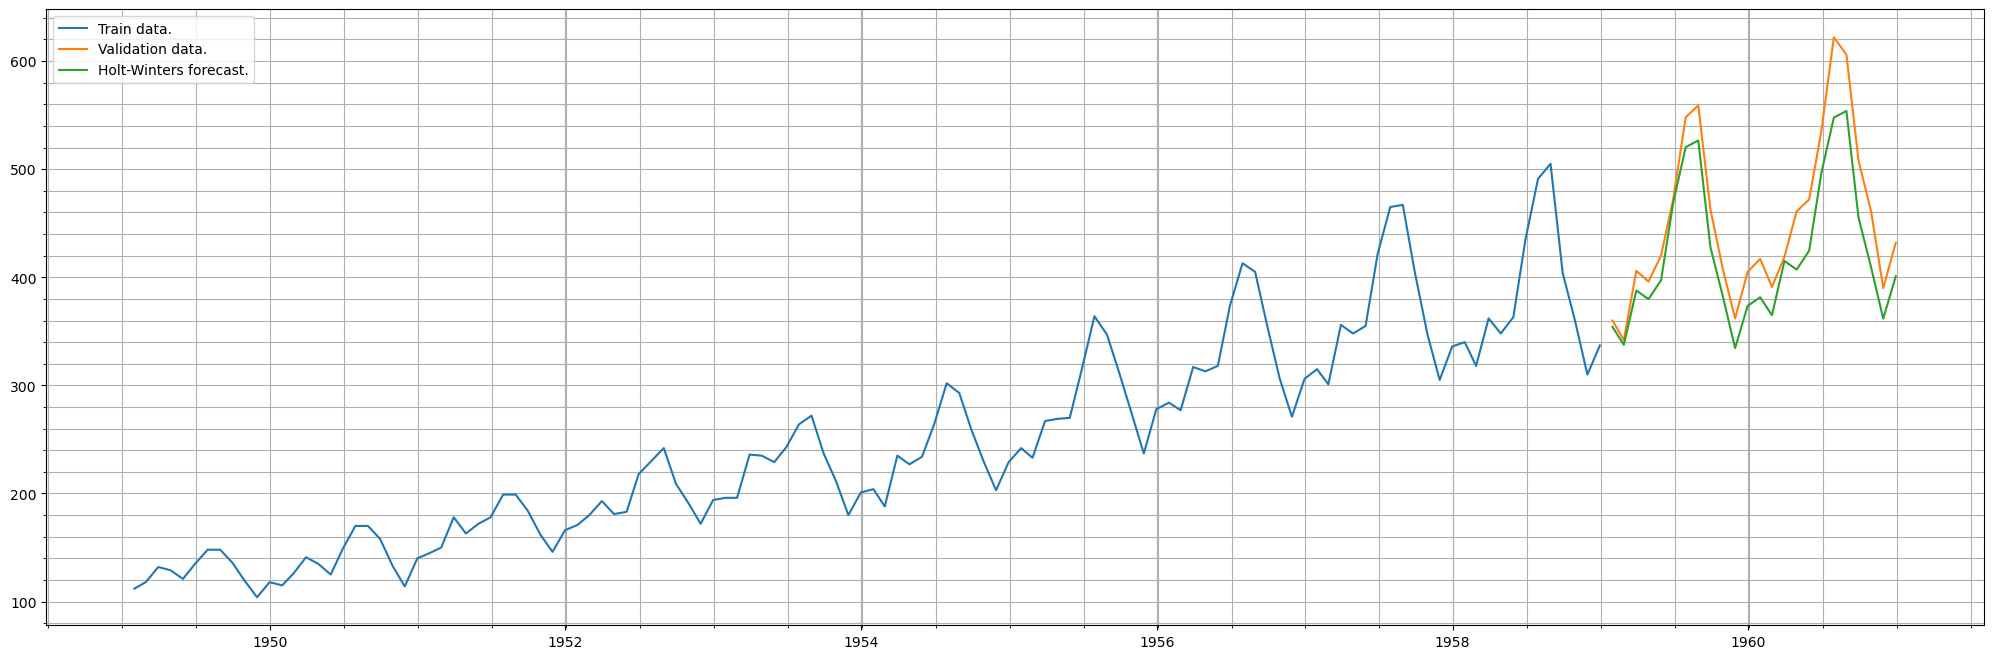

In [14]:
plt.figure(figsize=(25, 8))
plt.plot(train_data, label='Train data.')
plt.plot(validation_data, label='Validation data.')
plt.plot(validation_forecast_add_add, label='Holt-Winters forecast.')

plt.legend(loc='best')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

In [15]:
add_add_model = mean_squared_error(validation_data.values, validation_forecast_add_add.values, squared=False)
add_add_model

35.75645810786757

### The forecast seems pretty good but it can probably be improved. The RMSE will reduce further.

In [16]:
validation_forecast_mul_mul = ExponentialSmoothing(train_data, trend='multiplicative', seasonal='multiplicative', 
                                                  initialization_method='estimated')

In [17]:
validation_forecast_mul_mul = validation_forecast_mul_mul.fit(optimized=True)

In [18]:
validation_forecast_mul_mul.summary()

Dep. Variable:,Pax,No. Observations:,120
Model:,ExponentialSmoothing,SSE,10805.214
Optimized:,True,AIC,572.035
Trend:,Multiplicative,BIC,616.635
Seasonal:,Multiplicative,AICC,578.807
Seasonal Periods:,12,Date:,"Sat, 26 Oct 2024"
Box-Cox:,False,Time:,16:50:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3796486,alpha,True
smoothing_trend,8.7207e-07,beta,True


#### As we can see, from the previous model, the AIC (Akaike Information Criterion) value has dropped. This indicates a better forecast.

In [19]:
validation_forecast_mul_mul =  validation_forecast_mul_mul.forecast(len(validation_data))

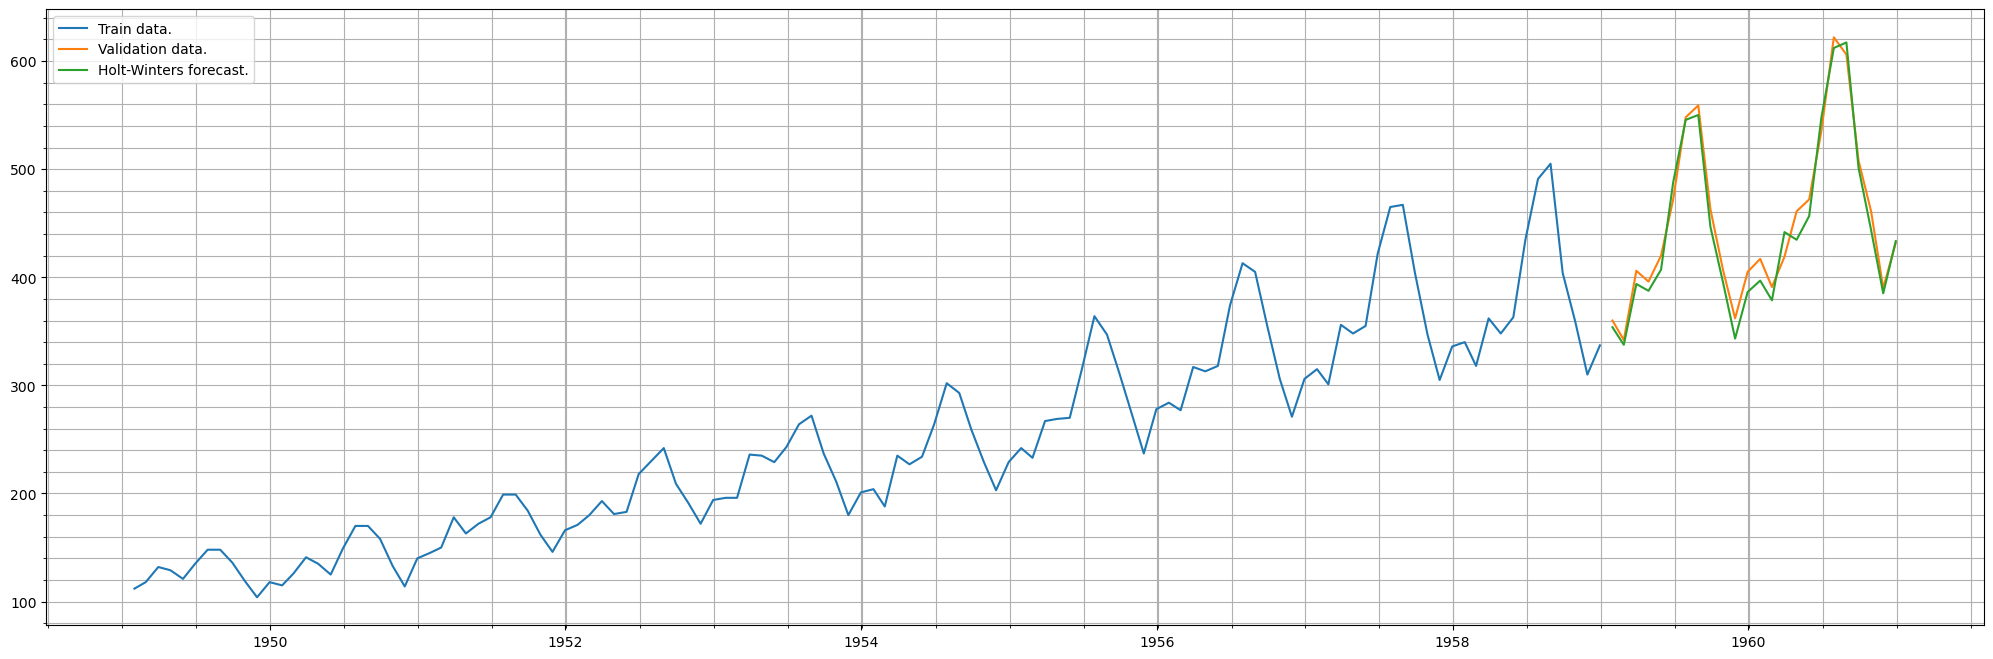

In [20]:
plt.figure(figsize=(25, 8))
plt.plot(train_data, label='Train data.')
plt.plot(validation_data, label='Validation data.')
plt.plot(validation_forecast_mul_mul, label='Holt-Winters forecast.')

plt.legend(loc='best')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

In [21]:
mul_mul_model = mean_squared_error(validation_data.values, validation_forecast_mul_mul.values, squared=False)
mul_mul_model

13.878606232650611

#### The RMSE is far better than the previous approach.
#### Now that we've decided the model, we can forecast for next year.

In [22]:
forecast_model = ExponentialSmoothing(passenger_data, trend='multiplicative', seasonal='multiplicative', 
                                      initialization_method='estimated')

In [23]:
forecast_model = forecast_model.fit(optimized=True)

In [24]:
forecast_model.summary()

Dep. Variable:,Pax,No. Observations:,144
Model:,ExponentialSmoothing,SSE,15805.297
Optimized:,True,AIC,708.553
Trend:,Multiplicative,BIC,756.070
Seasonal:,Multiplicative,AICC,714.025
Seasonal Periods:,12,Date:,"Sat, 26 Oct 2024"
Box-Cox:,False,Time:,16:50:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2918947,alpha,True
smoothing_trend,4.3695e-09,beta,True


In [25]:
forecast = forecast_model.predict(start='1960-12-31', end='1961-12-31')

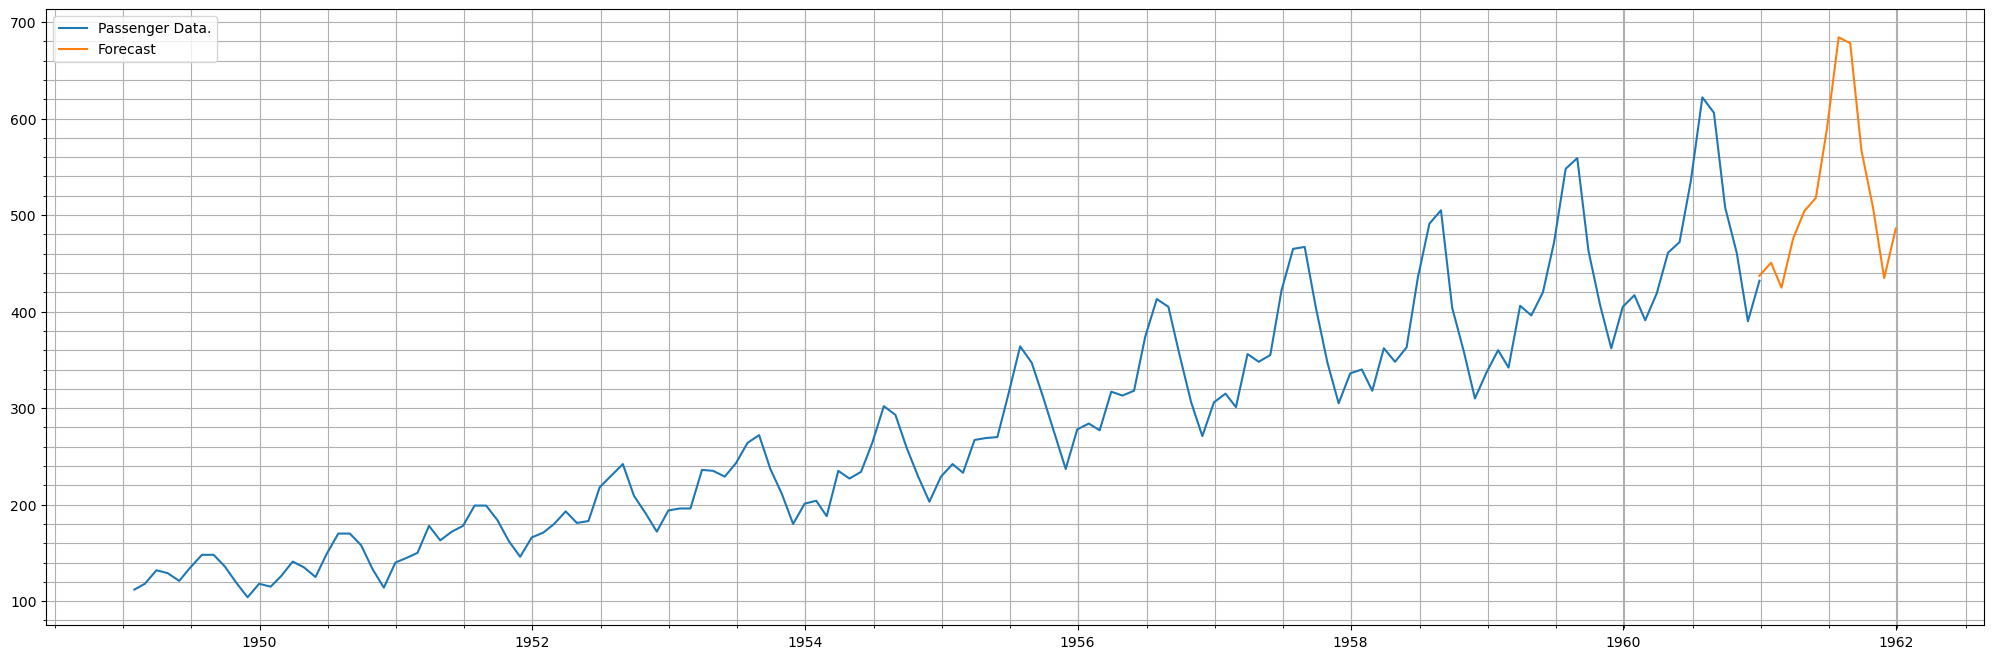

In [26]:
plt.figure(figsize=(25, 8))
plt.plot(passenger_data, label='Passenger Data.')
plt.plot(forecast, label='Forecast')
plt.legend(loc='best')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

In [27]:
date_range = pd.date_range(start='1960-12-31', end='1961-12-31', freq='M')
submission_dataframe = pd.DataFrame({
    'Year-Month': date_range,
    'Pax': forecast
})

In [28]:
submission_dataframe_file = ('../d. Output Files/AirPassenger/' + 'AirPassengerForecast.csv')
print(f"File name: {submission_dataframe_file.split('/')[3]}")
submission_dataframe.to_csv(submission_dataframe_file, index=False)

File name: AirPassengerForecast.csv
